# Etapa 1:
## abertura do  app e limpeza dos dados

In [71]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# abertura do arquivo
df = pd.read_csv('googleplaystore.csv')

#definição da palheta de cores
sns.set_palette("pastel")
cores = sns.color_palette()

# formatacao dos numeros dos graficos
def formatacao_sem_notacao(value, pos=None):
    units = [(1000, 'K+'), (1000000, 'M+'), (1000000000, 'B+')]
    if value == 0:
        return '0'
    for threshold, unit in units:
        if value < threshold:
            return f"{value:,.0f}{unit}"
        value /= threshold
    return f"{value:,.0f}B+"


# Tratamento dos dados
df = df.drop_duplicates()

df['Rating'] = pd.to_numeric(df['Rating'], errors='# Display the resultcoerce')
df = df[df['Rating'] <= 5]

df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Size'] = df['Size'].str.replace('M', '')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


# Etapa 2:
## Gráfico de barras com os 5 apps mais instalados

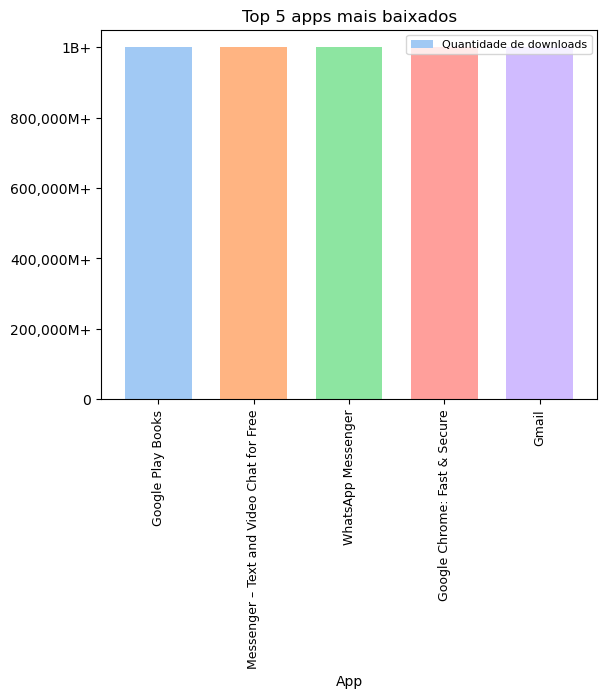

In [72]:

# Definição dos apps mais baixados
MAIS_VENDIDOS = df.nlargest(5, 'Installs')
MAIS_VENDIDOS['Quantidade de downloads'] = MAIS_VENDIDOS['Installs']

# Criação do gráfico
ax = MAIS_VENDIDOS.plot.bar(x='App', y='Quantidade de downloads', color=cores, width=0.7)
ax.set_title('Top 5 apps mais baixados')
plt.legend(prop={'size': 8})
plt.xticks(fontsize=9)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatacao_sem_notacao))
plt.show()

# Etapa 3:
## Gráfico de pizza da frequencia de apps por categoria

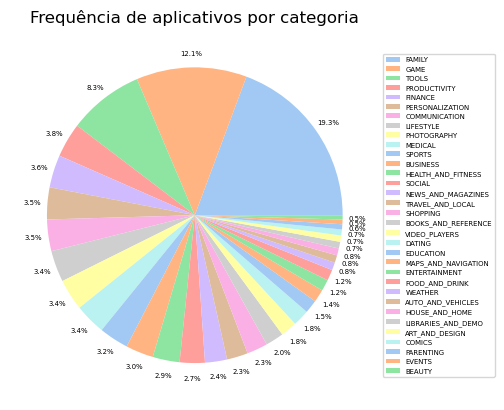

In [73]:

# Definição da frequencia de cada categoria
frequencia = df['Category'].value_counts()

# Criação do gráfico
patches, texts, autotexts = plt.pie(frequencia, autopct='%1.1f%%', textprops={'fontsize': 5}, colors = cores, pctdistance=1.1)
plt.legend(patches, frequencia.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 5})
plt.ylabel('') 
plt.xlabel('')
plt.title('Frequência de aplicativos por categoria')
plt.show()

# Etapa 4:
## Apps mais caro no dataset

In [74]:
# Encontrando o mais caro
MAIS_CARO = df.nlargest(1, 'Price')

# Organizando o Output
MAIS_CARO['Nome do aplicativo'] = MAIS_CARO['App']
MAIS_CARO['Preço'] = '$' + MAIS_CARO['Price'].astype(str)
display(MAIS_CARO[['Nome do aplicativo', 'Preço']])

,Nome do aplicativo,Preço
4367,I'm Rich - Trump Edition,$400.0


# Etapa 5:
## Quantidade de apps +17 na playstore

In [75]:
# encontrando a quantia de apps +17 
QUANTIAMAIOR17 = df['Content Rating'].value_counts().get('Mature 17+', 0)

print("Existem", QUANTIAMAIOR17, "aplicativos com conteúdo +17 na PlayStore")

Existem 411 aplicativos com conteúdo +17 na PlayStore


# Etapa 6:
## 10 apps com mais reviews

In [76]:
# Encontrando os 10 apps com mais reviews
TOP10MAISREVIEWS = df.drop_duplicates('App').nlargest(10, 'Reviews')

# Organizando o Output
TOP10MAISREVIEWS['Nome do aplicativo'] = TOP10MAISREVIEWS['App']
display(TOP10MAISREVIEWS[['Nome do aplicativo', 'Reviews']])


,Nome do aplicativo,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


# Etapa 7:
## Maior App em tamanho

In [77]:

# Descobrindo qual o maior app
MAIORAPP = df.nlargest(1, 'Size')  

# Organizando o Output
MAIORAPP['Tamanho'] = MAIORAPP['Size'].astype(str) + ' Mb'
MAIORAPP['Nome do aplicativo'] = MAIORAPP['App']
display(MAIORAPP[['Nome do aplicativo', 'Tamanho']])


,Nome do aplicativo,Tamanho
1080,Post Bank,100.0 Mb


## Os maiores 10 ratings em apps +17

In [81]:
# Encontrando os apps +17 com melhores ratings
df_filtrado_mais17 = df[df['Content Rating'] == 'Mature 17+']
MAIORES10RATINGS = df_filtrado_mais17.nlargest(10, 'Rating')

# Organizando o Output
MAIORES10RATINGS['Avaliações'] = MAIORES10RATINGS['Rating']
MAIORES10RATINGS['Nome dos aplicativos'] = MAIORES10RATINGS["App"]
MAIORES10RATINGS = MAIORES10RATINGS.sort_values('Nome dos aplicativos')
display(MAIORES10RATINGS[['Nome dos aplicativos', 'Avaliações']])

,Nome dos aplicativos,Avaliações
2522,420 BZ Budeze Delivery,5.0
5489,AP Art History Flashcards,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
8275,DC N COMPANY ENTERTAINMENT RADIO!,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
6330,HON. B.J. ACS COLLEGE ALE,5.0
640,Online Girls Chat Group,5.0
654,Speeding Joyride & Car Meet App,5.0
2533,Zen Leaf,5.0


# Etapa 8:
## Gráfico de quantidade de reviews para avaliações

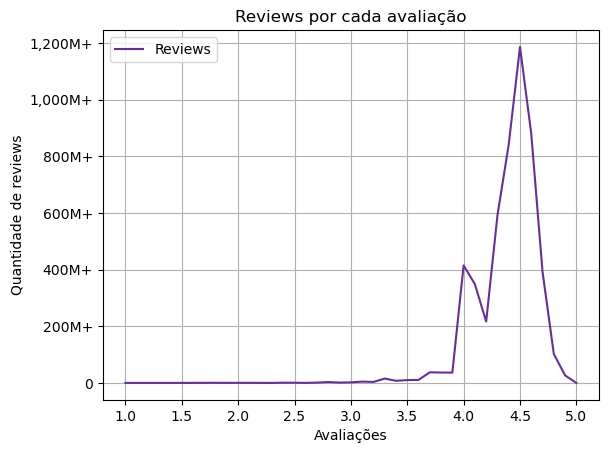

In [79]:


# Criação do gráfico
df_grouped = df.groupby('Rating')['Reviews'].mean().reset_index()
df_grouped.plot(x='Rating', y='Reviews', kind='line', color = '#662E9B' )
plt.title('Reviews por cada avaliação')
plt.xlabel('Avaliações')
plt.ylabel('Quantidade de reviews')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatacao_sem_notacao))
plt.grid(True)
plt.show()

## Gráfico de avaliações por categoria, entre as 10 categorias mais frequentes


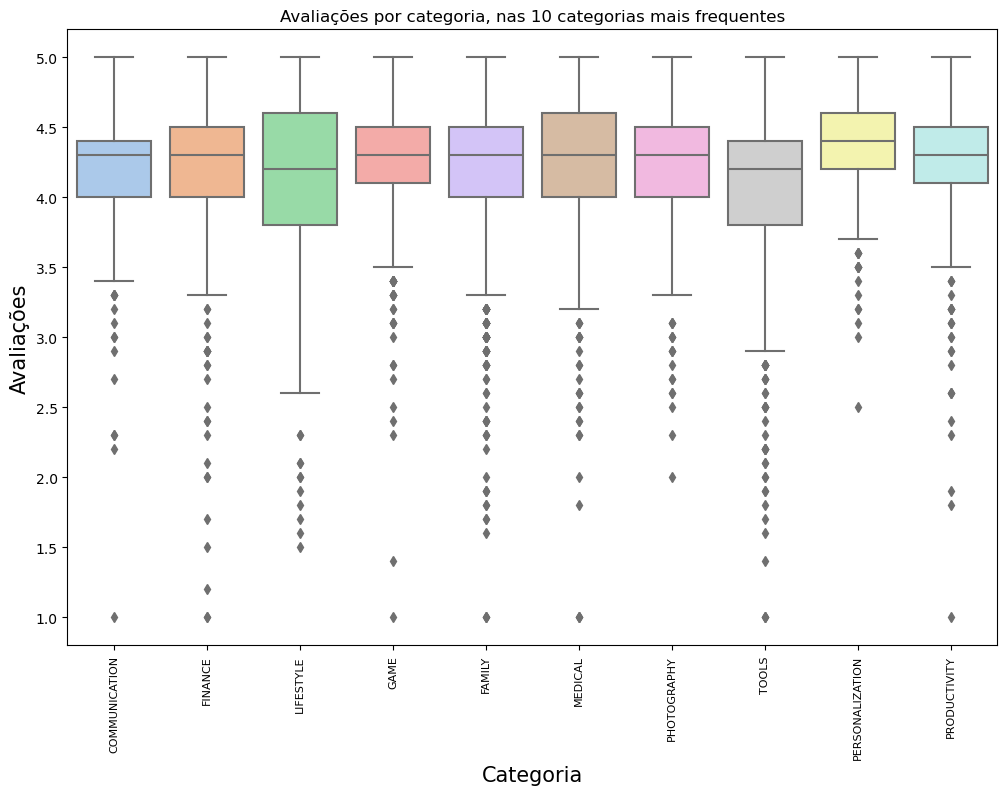

In [80]:
# Encontrando categorias mais frequentes
frequencia = df['Category'].value_counts().nlargest(10)

# Criação do gráfico
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df[df['Category'].isin(frequencia.index)], palette= cores)
plt.xticks(rotation=90, fontsize = 8)  
plt.title('Avaliações por categoria, nas 10 categorias mais frequentes')
plt.xlabel('Categoria', fontsize = 15)
plt.ylabel('Avaliações', fontsize = 15)
plt.show()